<a href="https://colab.research.google.com/github/surajn581/covid19_detection/blob/master/data_augmentation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

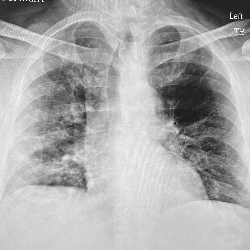

In [7]:
image = cv2.imread('figure1-COVID-00016.jpg')
image = cv2.resize(image, (250,250))
cv2_imshow(image)

In [8]:
image = tf.expand_dims(image, 0)

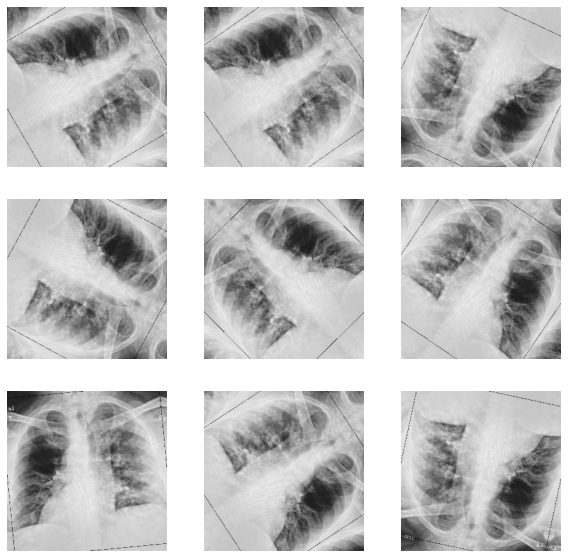

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [10]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [11]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

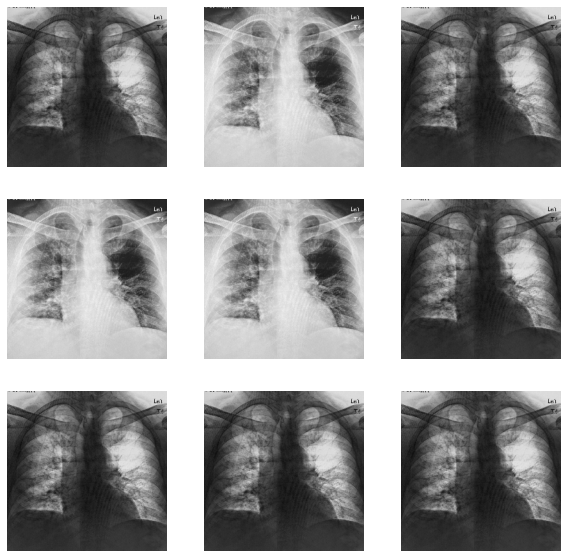

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [13]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

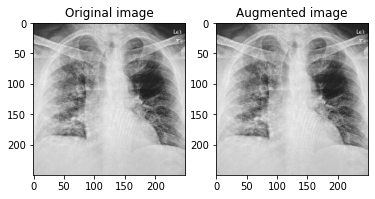

In [15]:
image = cv2.imread('figure1-COVID-00016.jpg')
image = cv2.resize(image, (250,250))
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

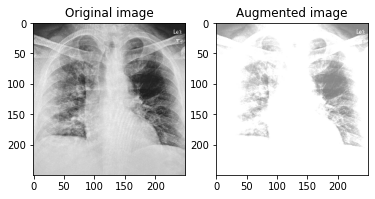

In [16]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)